In [26]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
df = pd.read_csv(r"C:\Users\insre\Downloads\Wine_clust.csv")
df.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [27]:
df.isnull().sum()
data=df.copy()
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data[data.columns]=sc.fit_transform(data)

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

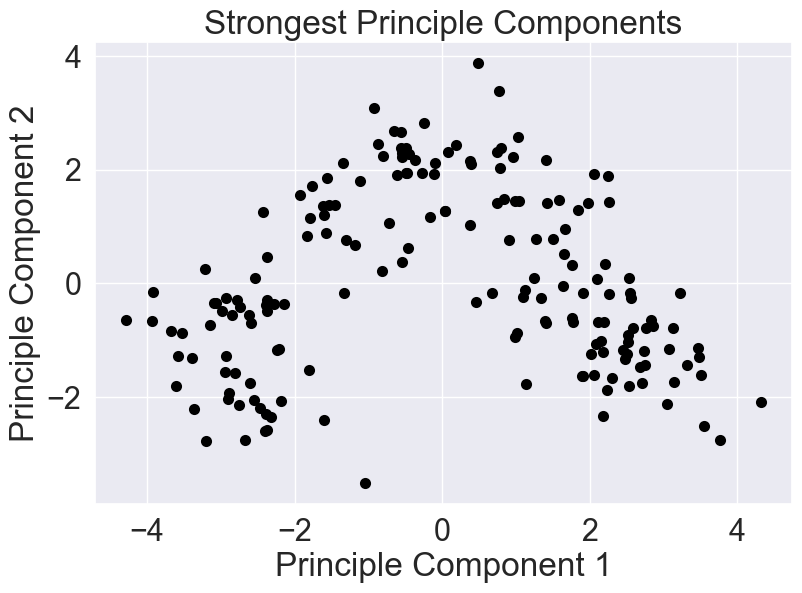

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid", rc={'figure.figsize':(9,6)}, font_scale=2)
plt.scatter(x=principalComponents[:,0], y=principalComponents[:,1], color="black", lw=2)
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("Strongest Principle Components")
plt.show()

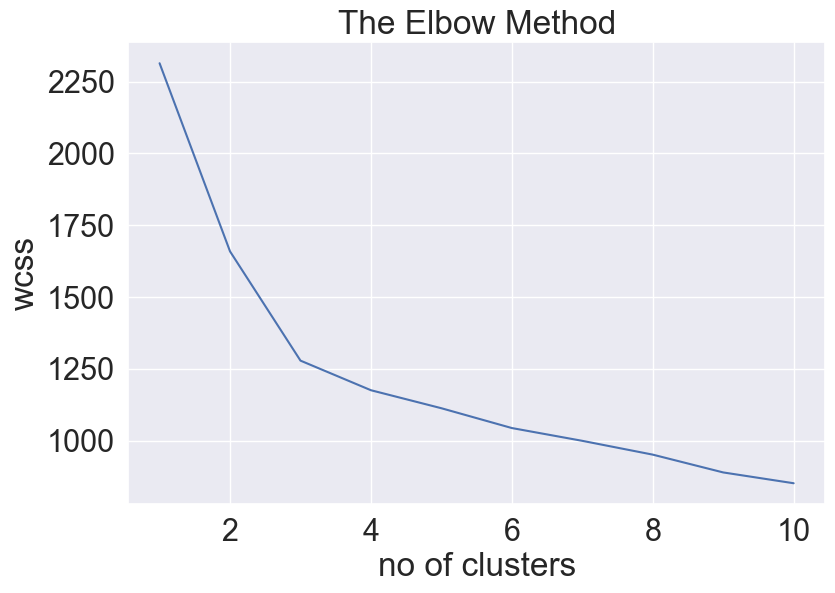

In [31]:
#Visualizing the ELBOW method to get the optimal value of K 
from sklearn.cluster import KMeans
wcss=[] # within cluster sum of sqaures
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

#inertia_ is the formula used to segregate the data points into clusters
import matplotlib.pyplot as plt
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [32]:
kmeans= KMeans(n_clusters=3, random_state=17, init='k-means++')
kmeans_labels= kmeans.fit_predict(data)
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
pd.Series(kmeans_labels).value_counts()

c:\Users\insre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


2    65
1    62
0    51
dtype: int64

In [33]:
centroids_df = pd.DataFrame(sc.inverse_transform(centroids), columns= df.columns)
centroids_df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
2,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


Text(0.5, 1.0, 'Clustered Data')

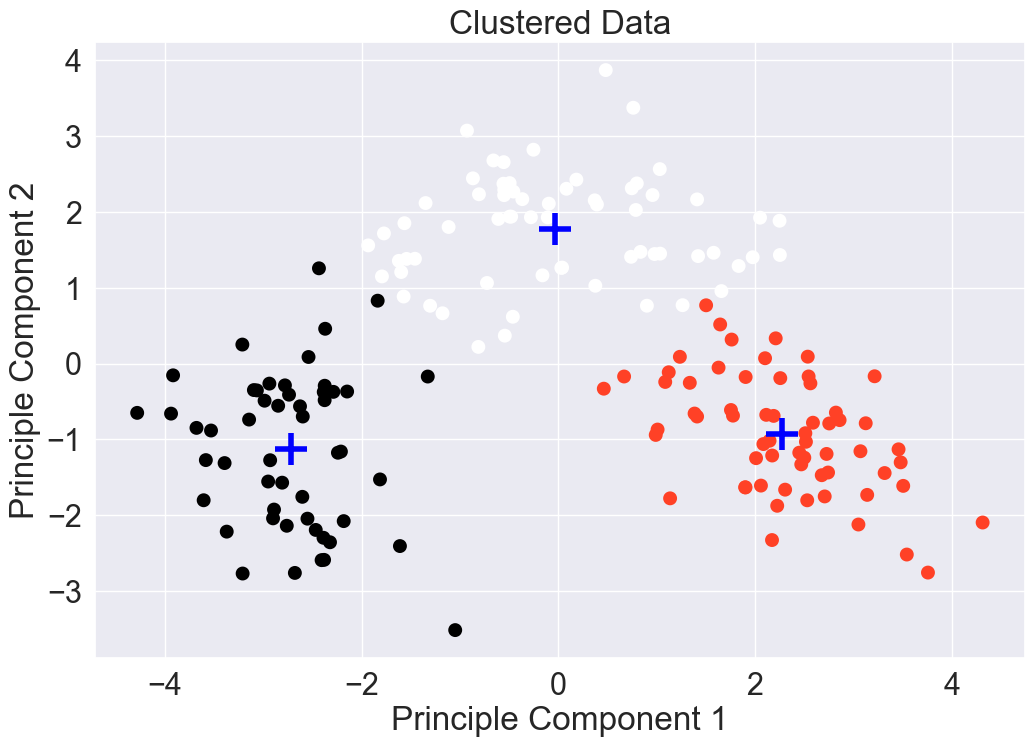

In [36]:
import textwrap


sns.set(style='darkgrid', rc={'figure.figsize':(12,8)},font_scale=2)
plt.scatter(x=principalComponents[:,0], y=principalComponents[:,1], c=kmeans_labels, cmap="CMRmap", lw=4)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="+", s=500, linewidths=3, lw=4, color="blue", zorder=10)
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("Clustered Data")


In [38]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(data, kmeans.labels_, metric='euclidean')
silhouette

0.2848589191898987

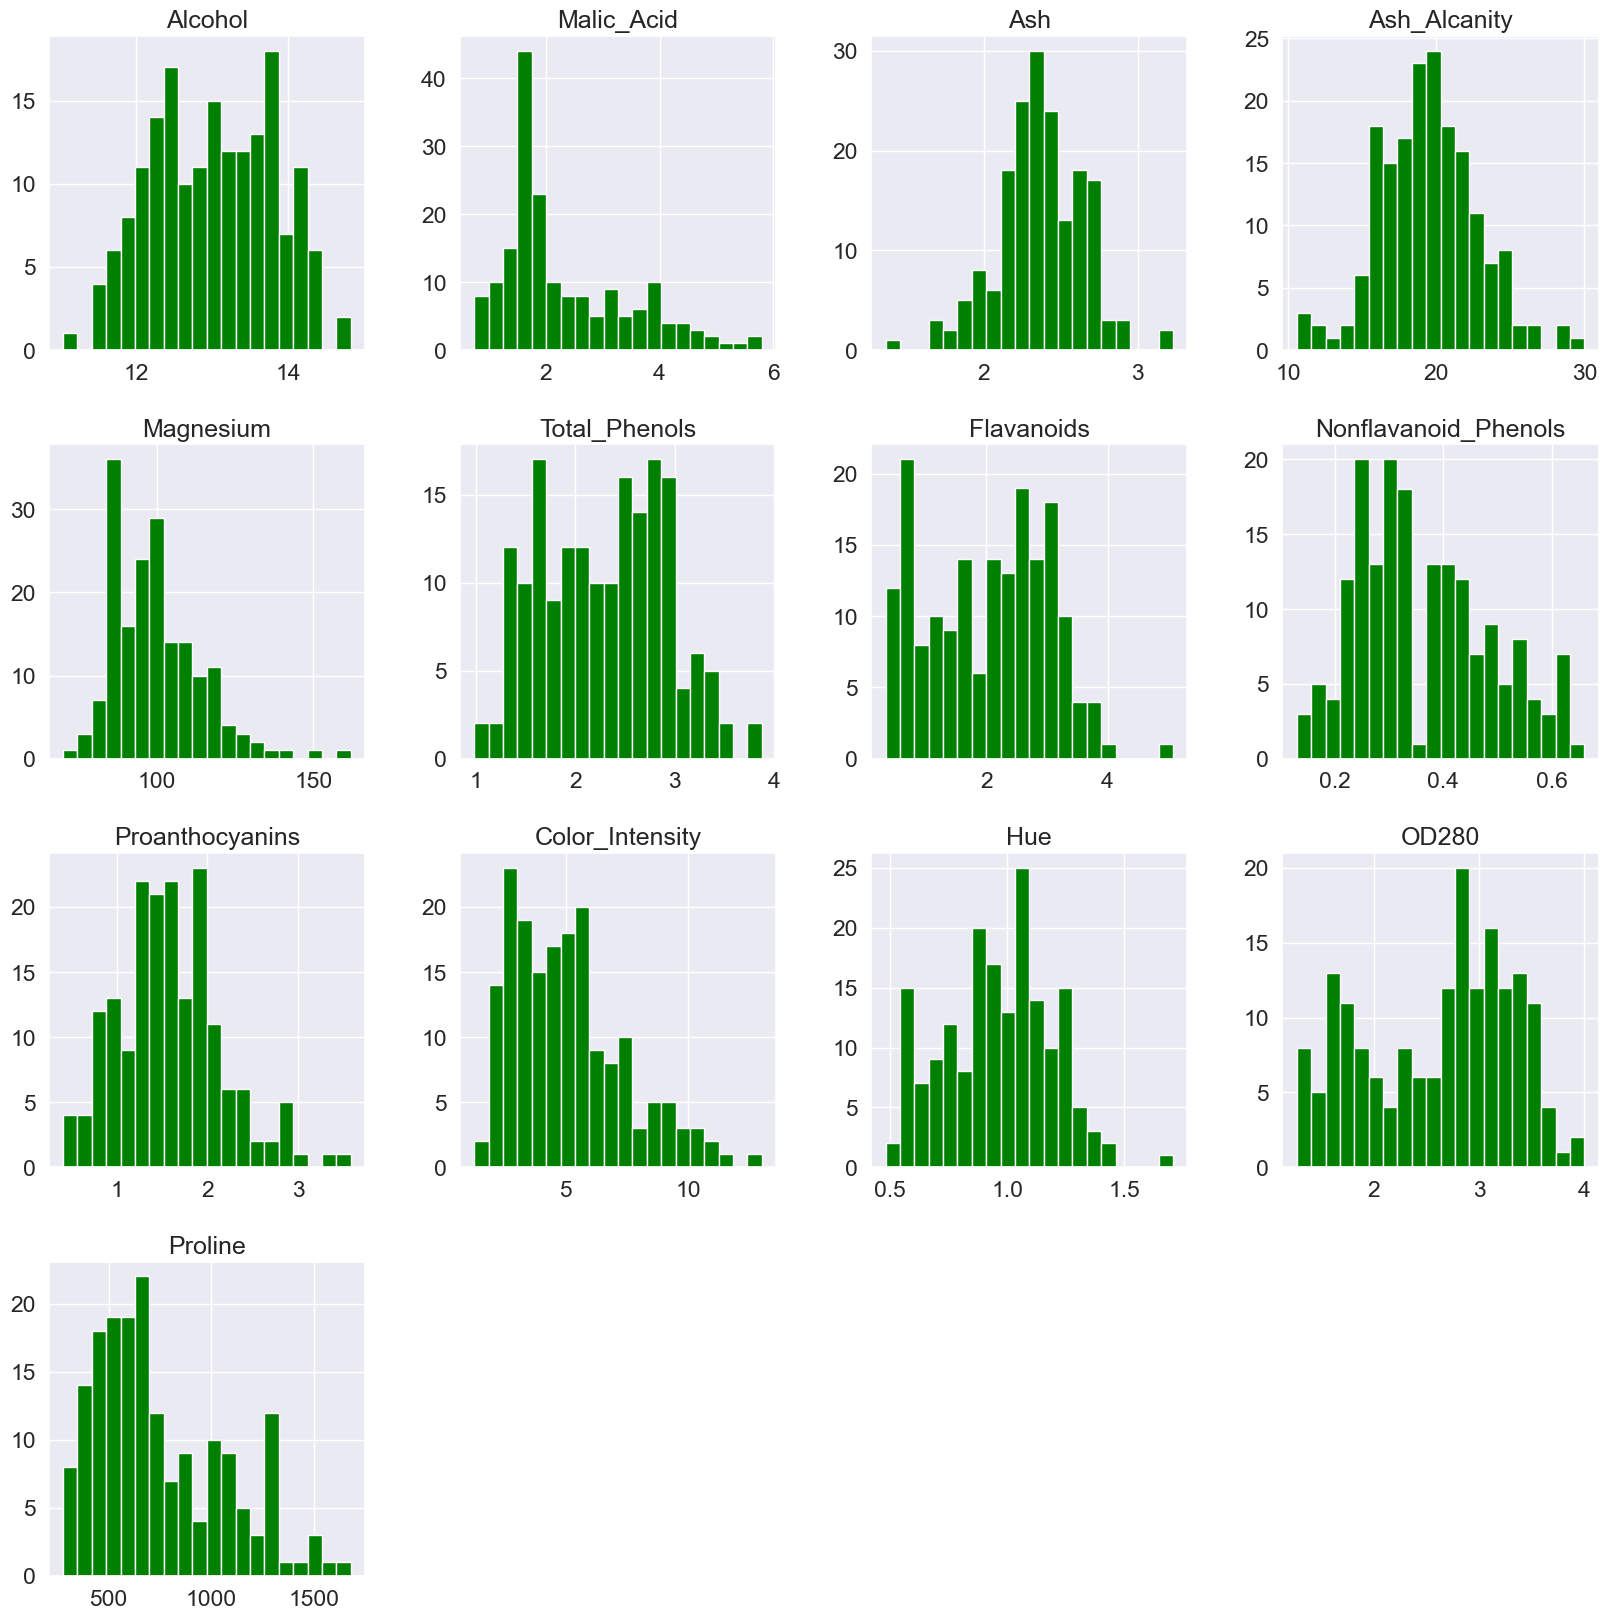

In [39]:
sns.set(style="darkgrid", font_scale=1.5, rc={'figure.figsize':(20,20)})
ax=df.hist(bins=20, color="green")